# Predicting the likelihood of survial in hepatitis patients for UCI dataset

## Step 1-Problem Formulation, Data Acquisition and Preparation

In [385]:
import pandas as pd
import numpy as np

df= pd.read_csv("raw_hepatitis.csv")
print(df.info())
df.head()
df.shape

#repalcing all the "?" in dataset with NaN
df.replace("?", np.nan, inplace = True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    float64
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    object 
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    object 
 6   Malaise          155 non-null    object 
 7   Anorexia         155 non-null    object 
 8   Liver_Big        155 non-null    object 
 9   Liver_Firm       155 non-null    object 
 10  Spleen_Palpable  155 non-null    object 
 11  Spiders          155 non-null    object 
 12  Ascites          155 non-null    object 
 13  Varices          155 non-null    object 
 14  Bilirubin        155 non-null    object 
 15  Alk_Phosphate    155 non-null    object 
 16  Sgot             155 non-null    object 
 17  Albumin         

Class               1
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver_Big          10
Liver_Firm         11
Spleen_Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk_Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [389]:


#numerical datas
num_col =['Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime']

#converting numerical attribute to Float type from object type
df["Bilirubin"] = df.Bilirubin.astype(float)
df["Alk_Phosphate"] = df.Alk_Phosphate.astype(float)
df["Sgot"] = df.Sgot.astype(float)
df["Albumin"] = df.Albumin.astype(float)
df["Protime"] = df.Protime.astype(float)

#fill null value by mean in numerical attributes
for col in num_col:
    df[col].fillna(df[col].mean(), inplace=True) 
    df[col]=df[col].round(2)
df.head(15)

# categorical datas
cat_col=['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']



for val in cat_col:
    df[val] = df[val].astype('string')
    sum_1=(df[val] == '1').sum()
    sum_2=(df[val] == '2').sum()
    
    #replace null valuewith
    if(sum_1 > sum_2):
        df[val]=df[val].fillna('1')
    else:
        df[val]=df[val].fillna('2')
    #######
    #replace numerical value with actual value for attribute  of categorical data
    # if(val == 'Sex'):
    #     df[val]=df[val].replace({'1':"Male", '2': "Female"})
    # else:
    #     df[val]=df[val].replace({'1':"No", '2': "Yes"})
     ######   
#repalce numerical value with actual value for attribute class
# df.Class.replace(1,"DIE", inplace=True)
# df.Class.replace(2,"LIVE", inplace=True)
###########
df['Class']=df.Class.fillna(2)
df['Class'] = df.Class.astype(int)
clean_hepatitis= df.to_csv('clean_hepatitis.csv', index=False)
df.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.00,18.0,4.0,61.85,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.00,42.0,3.5,61.85,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.00,32.0,4.0,61.85,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.00,52.0,4.0,80.00,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.33,200.0,4.0,61.85,1


## Step 2 - Data Exploration
### 2.1 Exploring each columns

#### 1. Class

Text(0.5, 1.0, 'Pie chart representing percentage of patient who lived and die due to hepatitis')

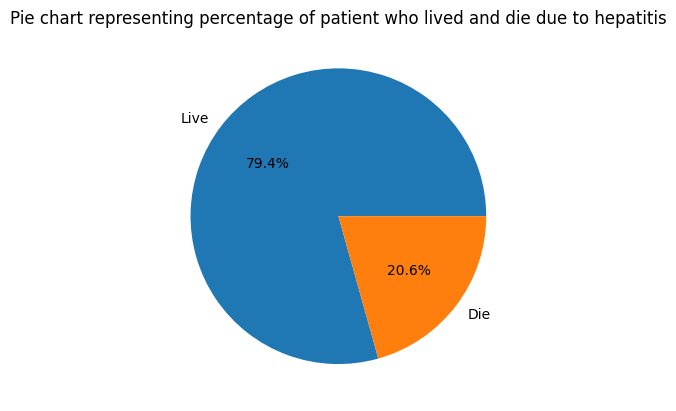

In [447]:
import matplotlib.pyplot as plt


#graphical representation of people that lived and died because of hepatitis
label_Class=df.Class.unique()
size_class=[(df['Class']== 2).sum(), (df['Class']== 1).sum()]

fig, ax = plt.subplots()
ax.pie(size_class, labels=['Live','Die'], autopct='%1.1f%%')
plt.title("Pie chart representing percentage of patient who lived and die due to hepatitis")

### 2. Age

Text(0.5, 1.0, 'Age of patients')

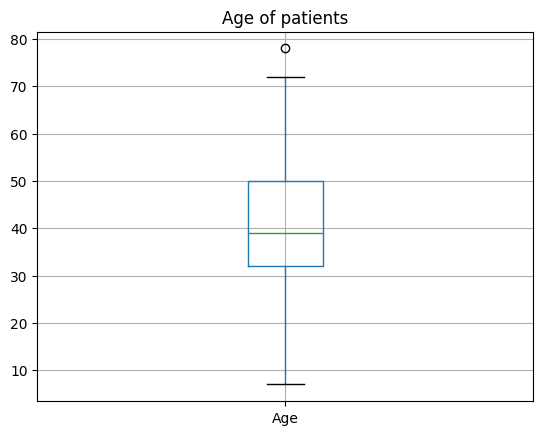

In [393]:
#boxpolt to represent age of people who suffered from hepatitis
df.boxplot(column=['Age'])  
plt.title('Age of patients')

### 3. Sex

([<matplotlib.axis.XTick at 0x281b4e350>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

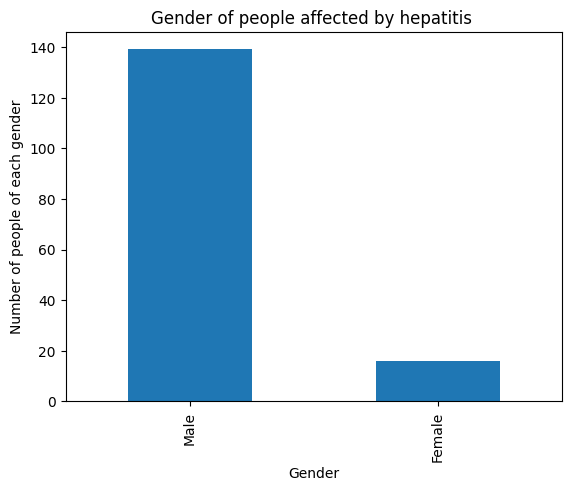

In [395]:
df.Sex.value_counts().plot(kind='bar' , xlabel="Gender", ylabel="Number of people of each gender", title="Gender of people affected by hepatitis ")
categories = ['Male', 'Female']
# Define the value-to-label mapping
label_mapping = {1: 'Male', 2: 'Female'}
# Set the x-axis tick labels
plt.xticks(range(len(categories)), [label_mapping.get(value) for value in range(1, len(categories) + 1)])

#1 male 2 female

### 4. Anorexia

Text(0.5, 1.0, 'Percentage of patients who had Anorexia Symptoms')

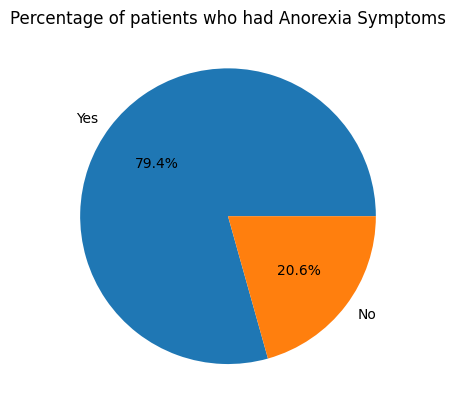

In [400]:
# df.plot.pie(y='Steroid', figsize=(5, 5))
labels_Anorexia=df.Anorexia.unique()

size_Anorexia=[(df['Anorexia']== '2').sum(), (df['Anorexia']== '1').sum()]
labels_Anorexia
fig, ax = plt.subplots()
ax.pie(size_Anorexia, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title("Percentage of patients who had Anorexia Symptoms")

### 5. Antivirals

([<matplotlib.axis.XTick at 0x282046740>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

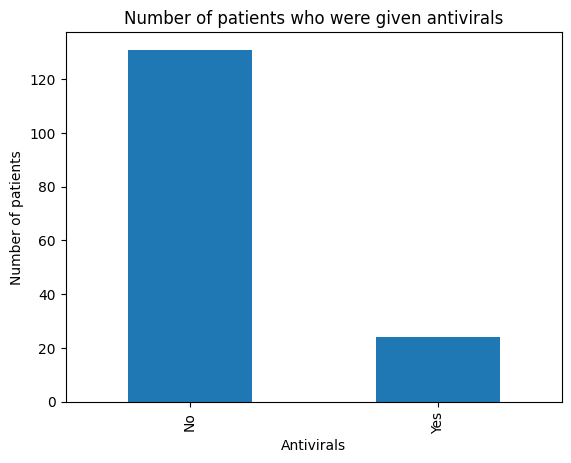

In [411]:
df.Antivirals.value_counts().plot(kind='bar' , xlabel="Antivirals", ylabel="Number of patients", title="Number of patients who were given antivirals")

categories = ['Yes', 'No']
# Define the value-to-label mapping
label_mapping = {2: 'Yes', 1: 'No'}
# Set the x-axis tick labels
plt.xticks(range(len(categories)), [label_mapping.get(value) for value in range(1, len(categories) + 1)])



### 6. Liver Firm

([<matplotlib.axis.XTick at 0x2820ae7d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

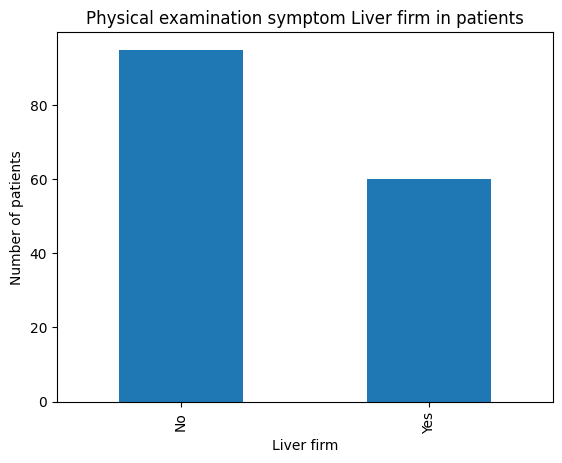

In [412]:
df.Liver_Firm.value_counts().plot(kind='bar' , xlabel="Liver firm", ylabel="Number of patients", title="Physical examination symptom Liver firm in patients")

categories = ['Yes', 'No']
# Define the value-to-label mapping
label_mapping = {2: 'Yes', 1: 'No'}
# Set the x-axis tick labels
plt.xticks(range(len(categories)), [label_mapping.get(value) for value in range(1, len(categories) + 1)])


### 7. Bilirubin

<Axes: title={'center': 'Histogram of Bilirubin value'}, xlabel='Bilirubin Value', ylabel='Bilirubin Count'>

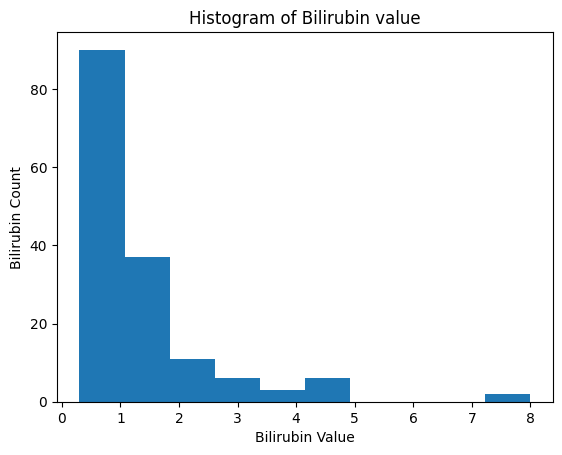

In [405]:
# df.Bilirubin.plot(kind='line', )
df['Bilirubin'].plot.hist(xlabel="Bilirubin Value", ylabel="Bilirubin Count", title="Histogram of Bilirubin value")

### 8. Alk Phosphate

<Axes: title={'center': 'Histogram of Alk Phosphate value'}, xlabel='Alk Phosphate Value', ylabel='Count of patients with Alk Phosphate value'>

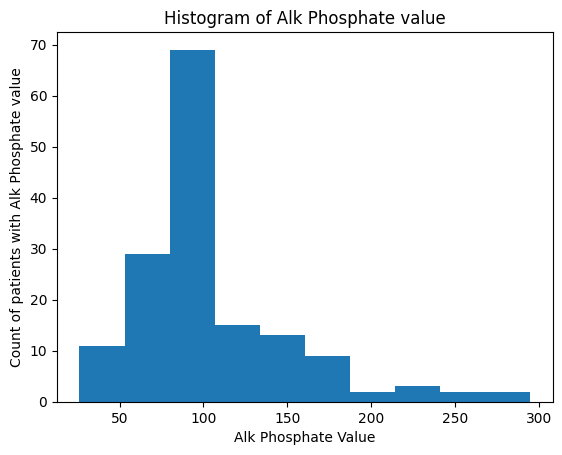

In [449]:

df['Alk_Phosphate'].plot.hist(xlabel="Alk Phosphate Value", ylabel="Count of patients with Alk Phosphate value", title="Histogram of Alk Phosphate value")

### 9. Sgot

<Axes: title={'center': 'Histogram of Sgot'}, xlabel='Sgot Value', ylabel='Count of patients with Sgot value'>

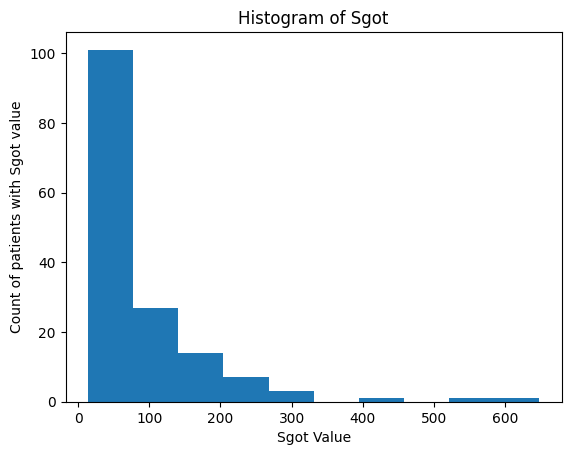

In [408]:
df['Sgot'].plot.hist(xlabel="Sgot Value", ylabel="Count of patients with Sgot value", title="Histogram of Sgot")

### 10. Histology

([<matplotlib.axis.XTick at 0x282135480>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

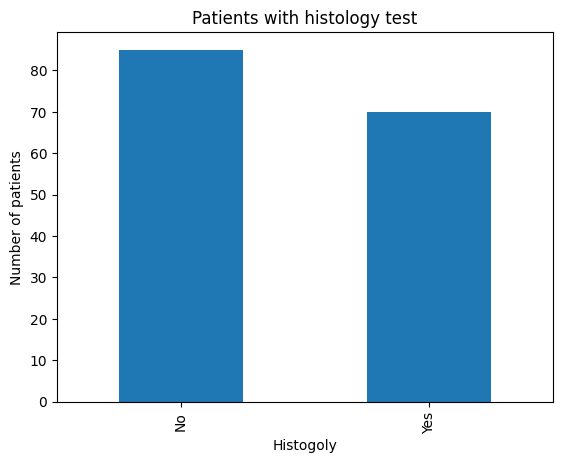

In [413]:
df.Histology.value_counts().plot(kind='bar' , xlabel="Histogoly", ylabel="Number of patients", title="Patients with histology test")
categories = ['Yes', 'No']
# Define the value-to-label mapping
label_mapping = {2: 'Yes', 1: 'No'}
# Set the x-axis tick labels
plt.xticks(range(len(categories)), [label_mapping.get(value) for value in range(1, len(categories) + 1)])

### 2.2 Exploring the relationship between pairs

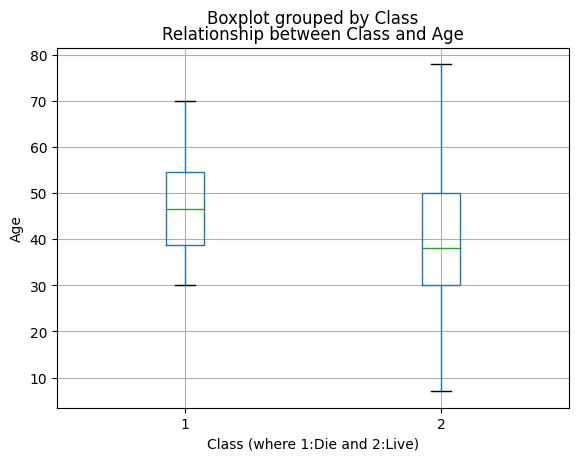

In [434]:
# box plot to show relation between Class and Age
df.boxplot(column='Age', by='Class')

plt.xlabel('Class (where 1:Die and 2:Live)')
plt.ylabel('Age')
plt.title('Relationship between Class and Age')
plt.show()


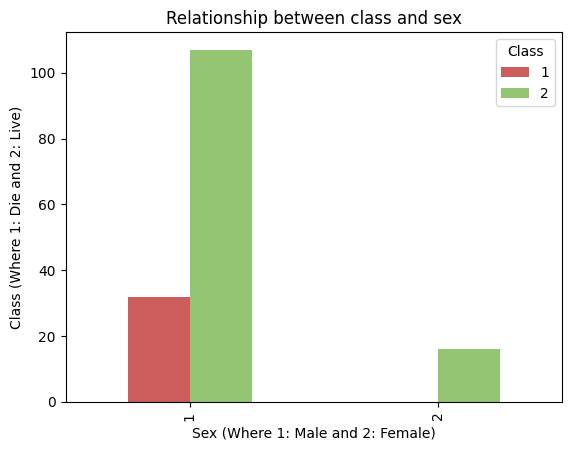

In [437]:
#grouped barchart to show relation between class and sex
df_cross = pd.crosstab(df['Sex'], df['Class'])
df_cross.plot(kind='bar', color= ['indianred', '#93C572'])
plt.xlabel('Sex (Where 1: Male and 2: Female)')
plt.ylabel('Class (Where 1: Die and 2: Live)')
plt.title('Relationship between class and sex')
plt.show()


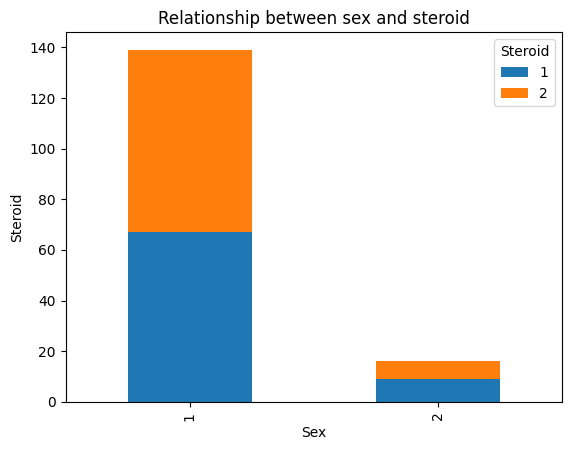

In [453]:
df_cross = pd.crosstab(df['Sex'], df['Steroid'])
df_cross.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Steroid')
plt.title('Relationship between sex and steroid')
plt.show()

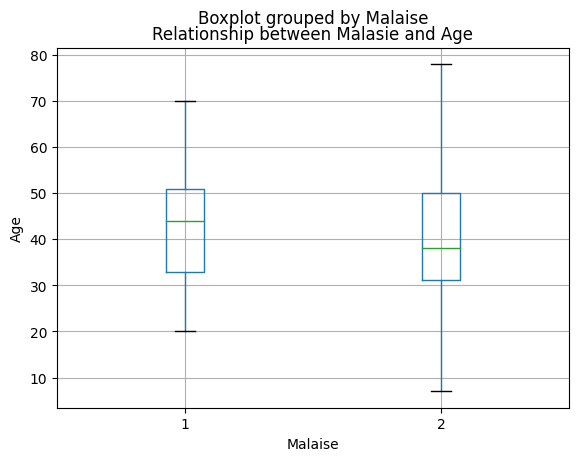

In [439]:
df.boxplot(column='Age', by='Malaise')
plt.xlabel('Malaise')
plt.ylabel('Age')
plt.title('Relationship between Malasie and Age')
plt.show()

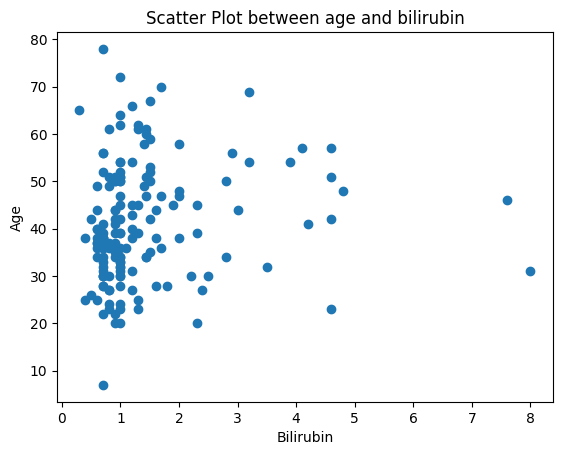

In [440]:
plt.scatter(df['Bilirubin'], df['Age'])
plt.xlabel('Bilirubin')
plt.ylabel('Age')
plt.title('Scatter Plot between age and bilirubin')
plt.show()

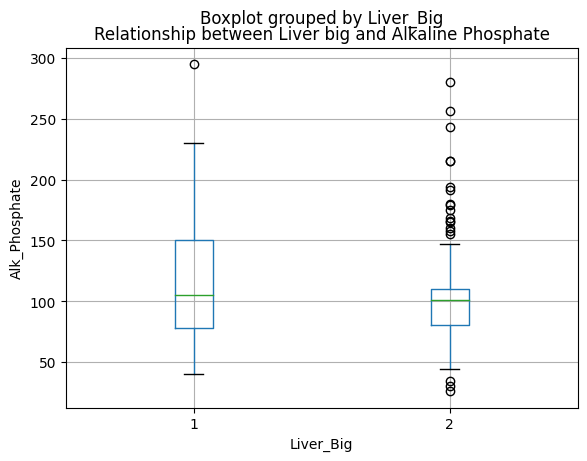

In [441]:
df.boxplot(column='Alk_Phosphate', by='Liver_Big')
plt.xlabel('Liver_Big')
plt.ylabel('Alk_Phosphate')
plt.title('Relationship between Liver big and Alkaline Phosphate')
plt.show()

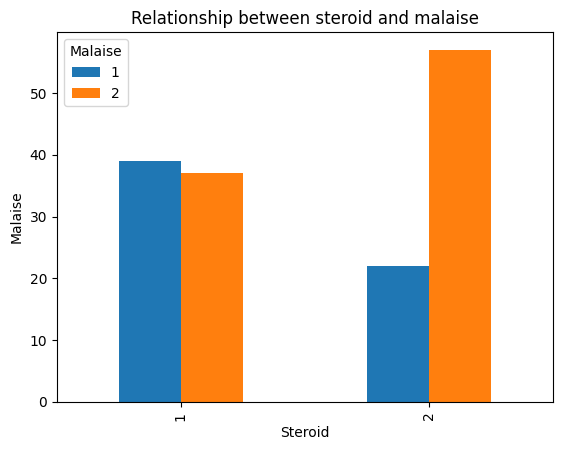

In [454]:
df_cross = pd.crosstab(df['Steroid'], df['Malaise'])
df_cross.plot(kind='bar')
plt.xlabel('Steroid')
plt.ylabel('Malaise')
plt.title('Relationship between steroid and malaise')
plt.show()

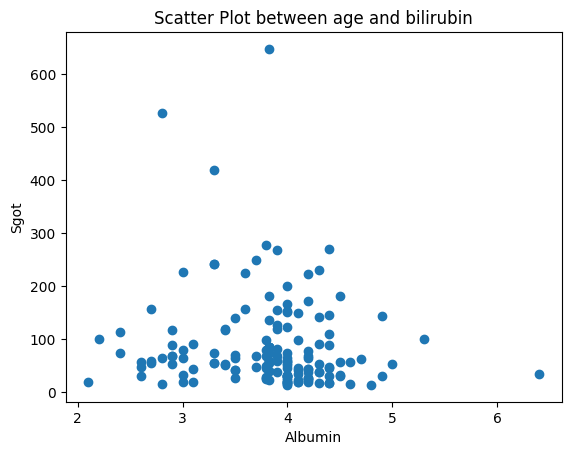

In [443]:
plt.scatter(df['Albumin'], df['Sgot'])
plt.xlabel('Albumin')
plt.ylabel('Sgot')
plt.title('Scatter Plot between age and bilirubin')
plt.show()

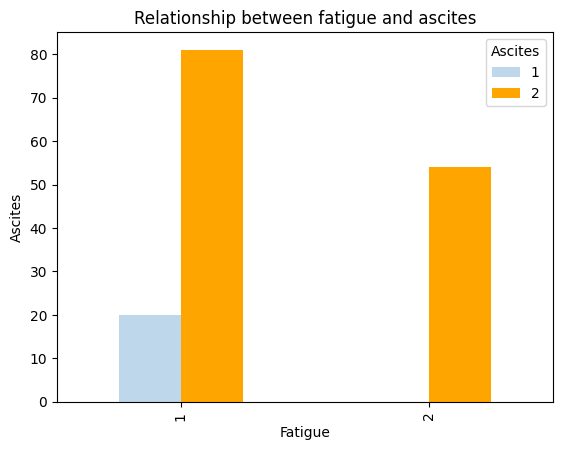

In [444]:
df_cross = pd.crosstab(df['Fatigue'], df['Ascites'])
df_cross.plot(kind='bar', color= ['#BFD7EA', 'orange'])
plt.xlabel('Fatigue')
plt.ylabel('Ascites')
plt.title('Relationship between fatigue and ascites')
plt.show()

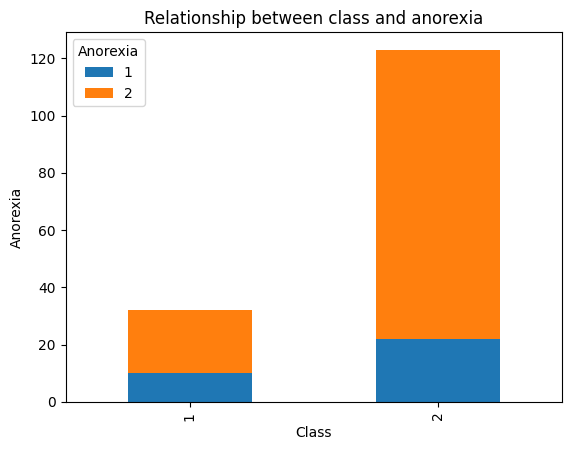

In [445]:
df_cross = pd.crosstab(df['Class'], df['Anorexia'])
df_cross.plot(kind='bar', stacked=True)
plt.xlabel('Class')
plt.ylabel('Anorexia')
plt.title('Relationship between class and anorexia')
plt.show()

### 2.3 Posing one meaningfull question
#### Among two medications Steroid and Antivirals which one was more effective ?

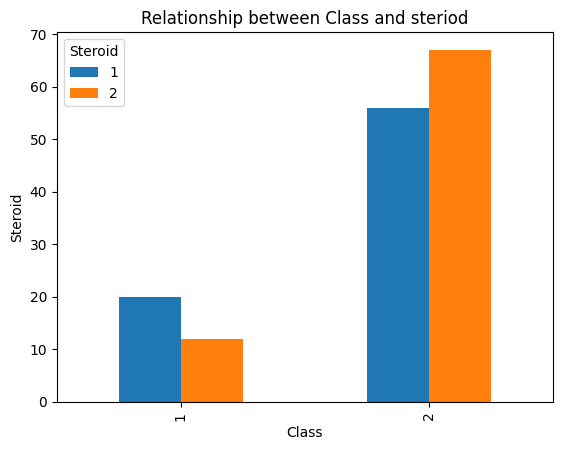

In [446]:
df_cross = pd.crosstab(df['Class'], df['Steroid'])
df_cross.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Steroid')
plt.title('Relationship between Class and steriod')
plt.show()

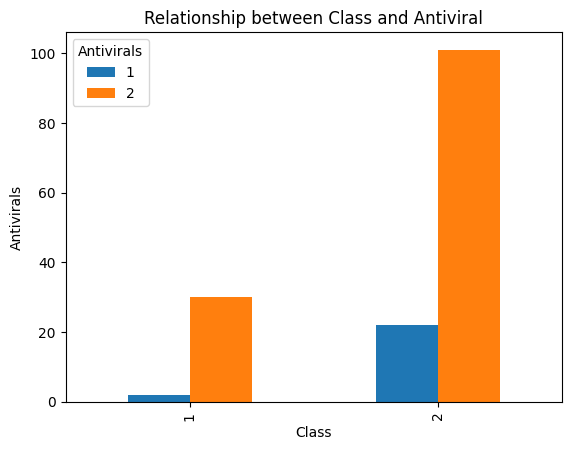

In [458]:
df_cross = pd.crosstab(df['Class'], df['Antivirals'])
df_cross.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Antivirals')
plt.title('Relationship between Class and Antiviral')
plt.show()

## Step 3 - Data Modelling

### 3.1 Splitting data into training set and test set

In [462]:
from sklearn.model_selection import train_test_split


# defining X and y for spliting from loaded dataset
X = df.drop("Class", axis=1)
y = df["Class"]  

# suite1: 50% training and 50% testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)

# suite2: 60% training and 40% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)

# suite3: 80% training and 20% testing
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)



print(X_train3.head())
# print(X_test)
# print(y_train)
# print(y_test)

     Age Sex Steroid Antivirals Fatigue Malaise Anorexia Liver_Big Liver_Firm   
96    30   1       1          2       1       1        2         2          1  \
122   42   1       2          2       2       2        2         2          2   
82    30   1       1          2       2       2        2         2          2   
109   33   1       1          2       1       1        2         2          2   
65    27   1       2          2       2       2        2         2          2   

    Spleen_Palpable Spiders Ascites Varices  Bilirubin  Alk_Phosphate   Sgot   
96                2       1       2       2        0.8         147.00  128.0  \
122               1       2       2       2        1.5          85.00   40.0   
82                2       2       2       2        0.7         100.00   31.0   
109               2       2       1       2        0.7          63.00   80.0   
65                2       2       2       2        0.8         105.33   38.0   

     Albumin  Protime Histology 

### 3.2 Select 2 models, train model and calculate given matrices

In [463]:
from sklearn.neighbors import KNeighborsClassifier

# KNN for suite 1

knn1 =KNeighborsClassifier(n_neighbors = 5)
knn_trained1 = knn1.fit(X_train1, y_train1)
# y_train_pred1=knn_trained.predict(X_train1)
y_pred1 = knn_trained.predict(X_test1)

# y_pred1.astype(int)

# KNN for suite 2
knn2 =KNeighborsClassifier(n_neighbors = 5)
knn_trained2 = knn2.fit(X_train2, y_train2)
y_pred2 = knn_trained2.predict(X_test2)

# y_pred2.astype(int)

# KNN for suite 3
knn3 =KNeighborsClassifier(n_neighbors = 5)
knn_trained3 = knn3.fit(X_train3, y_train3)
y_pred3 = knn_trained3.predict(X_test3)

# y_pred3.astype(int)
print(X_train1)
print(y_train_pred1)


     Age Sex Steroid Antivirals Fatigue Malaise Anorexia Liver_Big Liver_Firm   
98    47   1       2          2       2       2        2         2          2  \
150   46   1       2          2       1       1        1         2          2   
136   51   1       2          2       2       2        2         1          1   
47    28   2       2          2       1       1        2         2          1   
111   42   1       1          1       1       1        2         2          2   
..   ...  ..     ...        ...     ...     ...      ...       ...        ...   
71    34   1       1          2       1       1        2         1          1   
106   35   1       1          2       1       2        2         2          2   
14    47   1       1          1       2       2        2         2          2   
92    33   1       2          2       2       2        2         2          2   
102   27   1       1          2       1       2        2         2          1   

    Spleen_Palpable Spiders

In [464]:
#Evaluating performance metrices  for knn

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#for suite 1

#calculating confusion matrix
confusion_mat1 = confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix:")
print(confusion_mat1)

# Calculating accuracy 
accuracy_1 = accuracy_score(y_test1, y_pred1).round(2)
print("Accuracy:", accuracy_1)

# Calculating precision
precision_1 = precision_score(y_test1, y_pred1).round(2)
print("Precision:", precision_1)

# Calculating  recall
recall_1 = recall_score(y_test1, y_pred1).round(2)
print("Recall:", recall_1)

#Calculating F1 score
f1_score1 = f1_score(y_test1, y_pred1).round(2)
print("F1 Score:", f1_score1)

Confusion Matrix:
[[ 2 14]
 [ 1 61]]
Accuracy: 0.81
Precision: 0.67
Recall: 0.12
F1 Score: 0.21


In [465]:
#for suite 2

#calculating confusion matrix
confusion_mat2 = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix:")
print(confusion_mat2)

# Calculating accuracy 
accuracy_2 = accuracy_score(y_test2, y_pred2).round(2)
print("Accuracy:", accuracy_2)

# Calculating precision
precision_2 = precision_score(y_test2, y_pred2).round(2)
print("Precision:", precision_2)

# Calculating  recall
recall_2 = recall_score(y_test2, y_pred2).round(2)
print("Recall:", recall_2)

#Calculating F1 score
f1_score2 = f1_score(y_test2, y_pred2).round(2)
print("F1 Score:", f1_score2)

Confusion Matrix:
[[ 0 14]
 [ 2 46]]
Accuracy: 0.74
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [466]:
#for suite 3

#calculating confusion matrix
confusion_mat3 = confusion_matrix(y_test3, y_pred3)
print("Confusion Matrix:")
print(confusion_mat3)

# Calculating accuracy 
accuracy_3 = accuracy_score(y_test3, y_pred3).round(2)
print("Accuracy:", accuracy_3)

# Calculating precision
precision_3 = precision_score(y_test3, y_pred3).round(2)
print("Precision:", precision_3)

# Calculating  recall
recall_3 = recall_score(y_test3, y_pred3).round(2)
print("Recall:", recall_3)

#Calculating F1 score
f1_score3 = f1_score(y_test3, y_pred3).round(2)
print("F1 Score:", f1_score3)

Confusion Matrix:
[[ 0  7]
 [ 0 24]]
Accuracy: 0.77
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/minimaharjan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision tree

In [467]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree
# For suite 1
dt1 = DecisionTreeClassifier()
dt_trained1 =dt1.fit(X_train1, y_train1)
y_dt_pred1 =dt_trained1.predict(X_test1)
y_dt_pred1

# For suite 2
dt2 = DecisionTreeClassifier()
dt_trained2 =dt2.fit(X_train2, y_train2)
y_dt_pred2 =dt_trained2.predict(X_test2)
y_dt_pred2

# For suite 3
dt3 = DecisionTreeClassifier()
dt_trained3 =dt3.fit(X_train3, y_train3)
y_dt_pred3 =dt_trained3.predict(X_test3)
y_dt_pred3

array([2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 1])

In [468]:
#Evaluating performance metrics  for decision tree
#for suite 1

#calculating confusion matrix
dt_confusion_mat1 = confusion_matrix(y_test1, y_dt_pred1)
print("Confusion Matrix:")
print(dt_confusion_mat1)

# Calculating accuracy 
dt_accuracy_1 = accuracy_score(y_test1, y_dt_pred1).round(2)
print("Accuracy:", dt_accuracy_1)

# Calculating precision
dt_precision_1 = precision_score(y_test1, y_dt_pred1).round(2)
print("Precision:", dt_precision_1)

# Calculating  recall
dt_recall_1 = recall_score(y_test1, y_dt_pred1).round(2)
print("Recall:", dt_recall_1)

#Calculating F1 score
dt_f1_score1 = f1_score(y_test1, y_dt_pred1).round(2)
print("F1 Score:", dt_f1_score1)

Confusion Matrix:
[[ 8  8]
 [ 9 53]]
Accuracy: 0.78
Precision: 0.47
Recall: 0.5
F1 Score: 0.48


In [469]:
#for suite 2

#calculating confusion matrix
dt_confusion_mat2 = confusion_matrix(y_test2, y_dt_pred2)
print("Confusion Matrix:")
print(dt_confusion_mat2)

# Calculating accuracy 
dt_accuracy_2 = accuracy_score(y_test2, y_dt_pred2).round(2)
print("Accuracy:", dt_accuracy_2)

# Calculating precision
dt_precision_2 = precision_score(y_test2, y_dt_pred2).round(2)
print("Precision:", dt_precision_2)

# Calculating  recall
dt_recall_2 = recall_score(y_test2, y_dt_pred2).round(2)
print("Recall:", dt_recall_2)

#Calculating F2 score
dt_f1_score2 = f1_score(y_test2, y_dt_pred2).round(2)
print("F1 Score:", dt_f1_score2)

Confusion Matrix:
[[ 5  9]
 [ 8 40]]
Accuracy: 0.73
Precision: 0.38
Recall: 0.36
F1 Score: 0.37


In [470]:
#for suite 3

#calculating confusion matrix
dt_confusion_mat3 = confusion_matrix(y_test3, y_dt_pred3)
print("Confusion Matrix:")
print(dt_confusion_mat3)

# Calculating accuracy 
dt_accuracy_3 = accuracy_score(y_test3, y_dt_pred3).round(2)
print("Accuracy:", accuracy_3)

# Calculating precision
dt_precision_3 = precision_score(y_test3, y_dt_pred3).round(2)
print("Precision:", dt_precision_3)

# Calculating  recall
dt_recall_3 = recall_score(y_test3, y_dt_pred3).round(2)
print("Recall:", dt_recall_3)

#Calculating F3 score
dt_f1_score3 = f1_score(y_test3, y_dt_pred3).round(2)
print("F1 Score:", dt_f1_score3)

Confusion Matrix:
[[ 1  6]
 [ 7 17]]
Accuracy: 0.77
Precision: 0.12
Recall: 0.14
F1 Score: 0.13


### 3.3 Comparing KNN and Decision tree via graphical visualization

/Users/minimaharjan/anaconda3/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


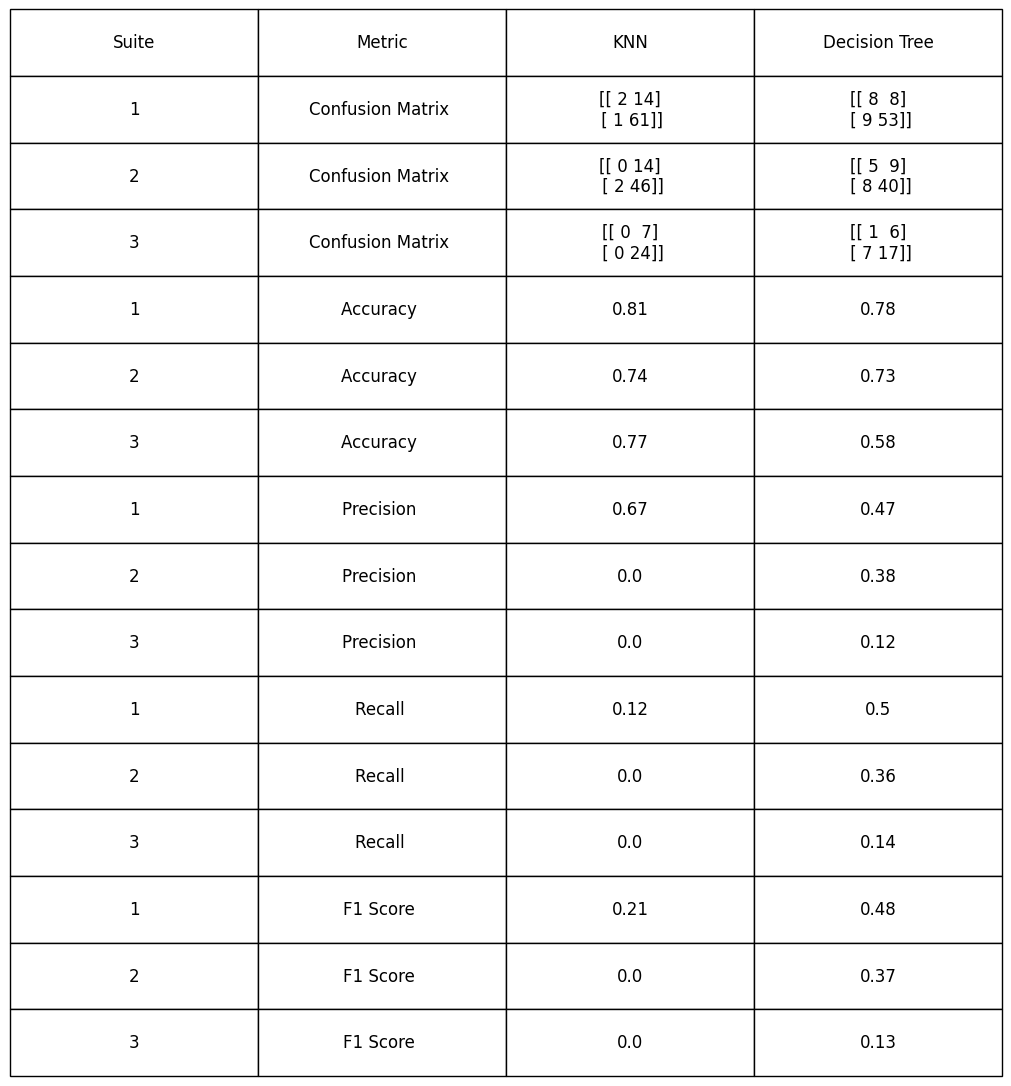

In [471]:
# Defining the performance metrics data for the table
data = [
    ["Suite","Metric", "KNN", "Decision Tree"],
    ["1", "Confusion Matrix ", confusion_mat1, dt_confusion_mat1],
    ["2", "Confusion Matrix ", confusion_mat2, dt_confusion_mat2],
    ["3", "Confusion Matrix ", confusion_mat3, dt_confusion_mat3],
    ["1", "Accuracy ", accuracy_1, dt_accuracy_1],
    ["2", "Accuracy ", accuracy_2, dt_accuracy_2],
    ["3", "Accuracy ", accuracy_3, dt_accuracy_3],
    ["1", "Precision ", precision_1, dt_precision_1],
    ["2", "Precision ", precision_2, dt_precision_2],
    ["3", "Precision ", precision_3, dt_precision_3],
    ["1", "Recall ", recall_1, dt_recall_1],
    ["2", "Recall ", recall_2, dt_recall_2],
    ["3", "Recall ", recall_3, dt_recall_3],
    ["1", "F1 Score ", f1_score1, dt_f1_score1],
    ["2", "F1 Score ", f1_score2, dt_f1_score2],
    ["3", "F1 Score ", f1_score3, dt_f1_score3]
]

# Create a figure and axes
fig, ax = plt.subplots()

# Hide the axis
ax.axis('off')

# Create the table
table = ax.table(cellText=data, loc='center', cellLoc='center', colLabels=None)
    
# Set the font size of the table
table.set_fontsize(12)

# Set the cell heights and widths
table.scale(2, 4)

# Show the plot
plt.show()